In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fpath = "C:/Users/davis.pazars/Documents/orkans/events/events.csv"
data = pd.read_csv(fpath)

data.head()

,datetime,region_id,max_rrate
0,2023-02-09 00:00,1,0.84708
1,2023-02-09 00:00,2,7.89762
2,2023-02-09 00:00,3,9.99846
3,2023-02-09 00:00,4,0.56460
4,2023-02-09 00:00,5,7.95514


In [7]:
data.dtypes

datetime      object
region_id      int64
max_rrate    float64
dtype: object

## Distribution check

In [185]:
data_days = data

data_days = data_days.drop('datetime', axis=1)
data_days['date'] = data['datetime'].dt.floor('1D')

aaa = data_days.groupby(['region_id', 'date'])['max_rrate'].mean()

aaa


region_id  date      
1          2023-02-09     1.544278
           2023-02-10     2.023119
           2023-02-11     2.128672
           2023-02-12     1.407925
           2023-02-13     1.143176
                           ...    
5          2023-03-23     3.649497
           2023-03-24     3.095683
           2023-03-25    17.688319
           2023-03-26    34.057435
           2023-03-27    22.875899
Name: max_rrate, Length: 230, dtype: float64

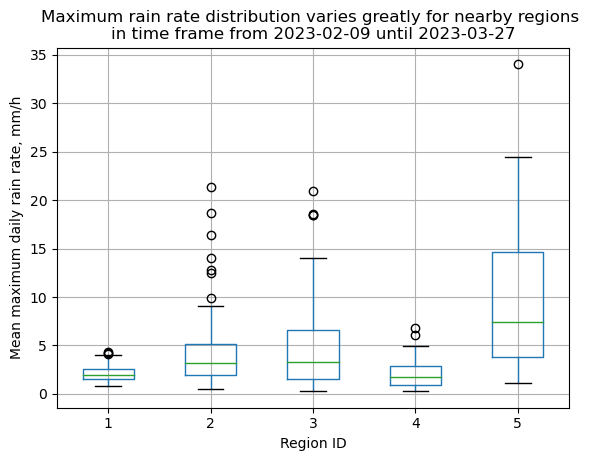

In [186]:
bbb = pd.plotting.boxplot(aaa, 'max_rrate', by='region_id')
bbb.set_xlabel("Region ID")
bbb.set_ylabel("Mean maximum daily rain rate, mm/h")
bbb.get_figure().suptitle('')

min_date = data_days['date'].min().strftime(format='%Y-%m-%d')
max_date = data_days['date'].max().strftime(format='%Y-%m-%d')
bbb.set_title(f"Maximum rain rate distribution varies greatly for nearby regions \nin time frame from {min_date} until {max_date}")
plt.show()

In [229]:
cc = data_days.groupby(['region_id', 'date'])['max_rrate'].mean().sort_values(ascending=False)

In [256]:
# 5 days with highest average maximum rain rate
pd.DataFrame(cc).loc[[1]].iloc[:5]

max_rrate
region_id date                 
1         2023-03-14   4.329027
          2023-03-24   4.196711
          2023-02-14   4.137916
          2023-03-20   4.026717
          2023-03-16   3.776340